## Question 1: Given the total number of acres burned by a fire in California, and data on wind conditions, can we predict the air quality in SF on the date that it is contained?


In [1]:
# Dependencies
from sqlalchemy import create_engine
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
rds_connection_string = "root:12345678@127.0.0.1/fires"
engine = create_engine(f'mysql+pymysql://{rds_connection_string}')

In [3]:
data = pd.read_sql("select * from final_daily_total_plus_wind", con=engine)
data = data[['date', 'size', 'avg_daily_wind_speed', 'fastest_2_min_speed', 'fastest_5_min_speed', 'overall_aqi']]
data.head()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


,date,size,avg_daily_wind_speed,fastest_2_min_speed,fastest_5_min_speed,overall_aqi
0,2001-01-01,1.5,3.58,10.1,10.1,153.0
1,2001-01-02,0.4,2.91,10.1,10.1,140.0
2,2001-01-03,0.5,2.68,10.1,10.1,140.0
3,2001-01-04,9.8,3.58,8.9,10.1,107.0
4,2001-01-05,146.0,4.70,15.0,17.0,124.0


In [4]:
data.describe()

,size,avg_daily_wind_speed,fastest_2_min_speed,fastest_5_min_speed,overall_aqi
count,5112.000000,5111.000000,5112.000000,5092.000000,4599.000000
mean,1426.914595,10.125146,22.879401,27.646524,46.785388
std,11637.409239,4.864894,7.088013,8.646965,19.892289
min,0.000000,0.450000,4.900000,6.000000,9.000000
25%,0.300000,6.710000,17.900000,21.900000,33.000000
50%,5.200000,10.070000,23.000000,28.000000,43.000000
75%,80.440000,13.200000,25.900000,32.000000,55.000000
max,315579.250000,125.040000,59.900000,70.900000,179.000000


In [5]:
data = data.fillna(0)

## Supervised machine learning

#### Preparing the data

In [6]:
data.head()

,date,size,avg_daily_wind_speed,fastest_2_min_speed,fastest_5_min_speed,overall_aqi
0,2001-01-01,1.5,3.58,10.1,10.1,153.0
1,2001-01-02,0.4,2.91,10.1,10.1,140.0
2,2001-01-03,0.5,2.68,10.1,10.1,140.0
3,2001-01-04,9.8,3.58,8.9,10.1,107.0
4,2001-01-05,146.0,4.70,15.0,17.0,124.0


In [7]:
X = data.drop(['date', 'overall_aqi'],axis=1)


In [8]:
X.head()

,size,avg_daily_wind_speed,fastest_2_min_speed,fastest_5_min_speed
0,1.5,3.58,10.1,10.1
1,0.4,2.91,10.1,10.1
2,0.5,2.68,10.1,10.1
3,9.8,3.58,8.9,10.1
4,146.0,4.70,15.0,17.0


In [9]:
y = data['overall_aqi'].values.reshape(-1,1)
print(X.shape, y.shape)

(5112, 4) (5112, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Linear Regression

In [11]:
model=LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Linear Regression Training Score: {training_score}")
print(f"Linear Regression Testing Score: {testing_score}")

Linear Regression Training Score: 0.06373582003804679
Linear Regression Testing Score: 0.07700855223447312


Text(0.5,1,'Residual Plot')

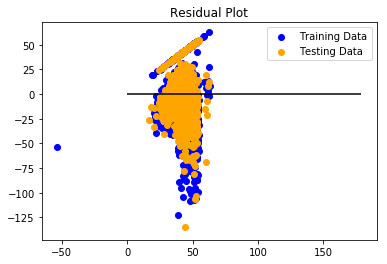

In [14]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

#### K Neighbors Regressor

In [15]:
knr = KNeighborsRegressor(n_neighbors=10)

In [16]:
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [17]:
knr.fit(X_train, y_train)
training_score = knr.score(X_train, y_train)
testing_score = knr.score(X_test, y_test)



print(f"K Neighbors Regressor Training Score: {training_score}")
print(f"K Neighbors Regressor Testing Score: {testing_score}")

K Neighbors Regressor Training Score: 0.29063382793408965
K Neighbors Regressor Testing Score: 0.08655876225538572


#### Gradient Boosting Regressor

In [18]:
gbr = GradientBoostingRegressor(n_estimators=200)

In [19]:
gbr.fit(X_train, y_train)
training_score = gbr.score(X_train, y_train)
testing_score = gbr.score(X_test, y_test)



print(f"Gradient Boosting Regressor Training Score: {training_score}")
print(f"Gradient Boosting Regressor Testing Score: {testing_score}")

Gradient Boosting Regressor Training Score: 0.6241226362114584
Gradient Boosting Regressor Testing Score: 0.4953709829143481


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Random Forest Regressor

In [20]:
rfr = RandomForestRegressor(n_estimators=50)

In [21]:
rfr.fit(X_train, y_train)
training_score = rfr.score(X_train, y_train)
testing_score = rfr.score(X_test, y_test)



print(f"Random Forest Regressor Training Score: {training_score}")
print(f"Random Forest Regressor Testing Score: {testing_score}")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Random Forest Regressor Training Score: 0.9215693015445645
Random Forest Regressor Testing Score: 0.4007167677966108


## Unsupervised machine learning

In [22]:
X = data.drop(['date'],axis=1)

In [23]:
X.head()

,size,avg_daily_wind_speed,fastest_2_min_speed,fastest_5_min_speed,overall_aqi
0,1.5,3.58,10.1,10.1,153.0
1,0.4,2.91,10.1,10.1,140.0
2,0.5,2.68,10.1,10.1,140.0
3,9.8,3.58,8.9,10.1,107.0
4,146.0,4.70,15.0,17.0,124.0


In [24]:
pca = PCA(n_components=2)

In [25]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca_data = pca.transform(X)

In [27]:
kmeans= KMeans(n_clusters=2)

In [28]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

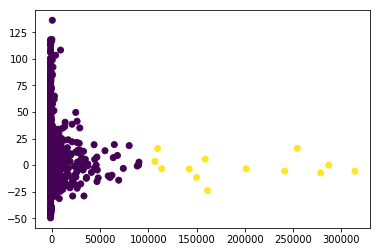

In [29]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans.labels_)

In [30]:
pca_data

array([[-1425.4148162 ,   113.03451925],
       [-1426.51479739,   100.23097463],
       [-1426.4147981 ,   100.24531427],
       ...,
       [-1426.80467152,    28.09920012],
       [-1426.91452385,   -42.35906962],
       [-1424.02450054,   -16.17927747]])